In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import re, string

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data['comment_text'][123]

'Should say something about his views as an educationalist and socialist political commentator.\n\nLink to http://www.langandlit.ualberta.ca/Fall2004/SteigelBainbridge.html mentions this a bit - he stood as an election candidate for Respect.'

In [6]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
length = data.comment_text.str.len()
length.describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64

In [4]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['none'] = 1 - data[label_cols].max(axis = 1)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


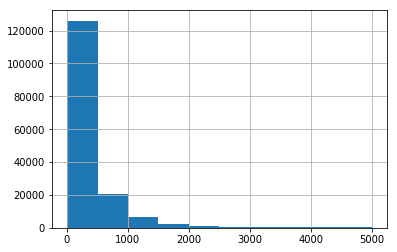

In [9]:
length.hist()

/home/sjaddya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


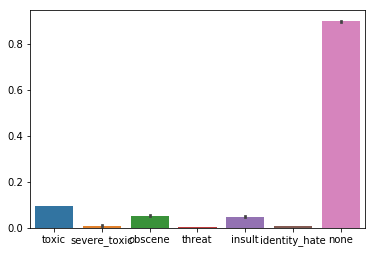

In [10]:
sns.barplot(data = data)

In [11]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.apply(lambda x : sum(x.isnull()))

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
none             0
dtype: int64

In [6]:
X = data[['comment_text']]
y = data[label_cols]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
54568,0,0,0,0,0,0
3786,0,0,0,0,0,0
22938,0,0,0,0,0,0
137856,0,0,0,0,0,0
143038,0,0,0,0,0,0


In [9]:
X_train.head()

,comment_text
54568,"""\n\nConflict of interest note\nBy your user n..."
3786,"(update: actually, I changed this to something..."
22938,"MRCA article \nSniperz11, thanks for your comm..."
137856,Arguing that BART and Caltrain should get more...
143038,"""\n\n Blocked \nHi, I blocked you for 24 hour..."


In [10]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

In [11]:
def tokenize(s):
    return re_tok.sub(r'\1', s).split()

In [12]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

In [13]:
X_train.shape

(111699, 1)

In [40]:
trn_vec_doc = vec.fit_transform(X_train['comment_text'])
test_vec_doc = vec.transform(X_test['comment_text'])

In [41]:
trn_vec_doc

<111699x324752 sparse matrix of type '<class 'numpy.float64'>'
	with 9666502 stored elements in Compressed Sparse Row format>

In [36]:
def model(y):
    lr=LogisticRegression(C=4, solver='saga')
    lr.fit(trn_vec_doc, y)
    return lr

In [37]:
preds = np.zeros((len(X_test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m = model(y_train[j])
    preds[:,i] = m.predict_proba(test_vec_doc)[:,1]

fit toxic
fit severe_toxic
fit obscene
fit threat


/home/sjaddya/anaconda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


fit insult
fit identity_hate


In [1]:
p = preds.round()

NameError: name 'preds' is not defined

In [116]:
for i, j in enumerate(label_cols):
    print(j)
    print(confusion_matrix(y_test[j], p[:, i]))
    print(f1_score(y_test[j], p[:, i]))

toxic
[[42988   302]
 [ 1868  2714]]
0.7143985259278759
severe_toxic
[[47299    87]
 [  379   107]]
0.31470588235294117
obscene
[[45186   130]
 [ 1089  1467]]
0.7064772453647964
threat
[[47728     8]
 [  115    21]]
0.2545454545454546
insult
[[45223   260]
 [ 1224  1165]]
0.6109071840587309
identity_hate
[[47418    22]
 [  364    68]]
0.26053639846743293
